In [96]:
# Job Posting Prediction (Real or Fake)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
df = pd.read_csv("fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [98]:
fake_job_postingss = pd.read_csv('fake_job_postings.csv')
fake_job_postingss.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

                    job_id  telecommuting  has_company_logo  has_questions  \
job_id            1.000000      -0.004559         -0.014539      -0.087025   
telecommuting    -0.004559       1.000000         -0.019836       0.020345   
has_company_logo -0.014539      -0.019836          1.000000       0.233932   
has_questions    -0.087025       0.020345          0.233932       1.000000   
fraudulent        0.079872       0.034523         -0.261971      -0.091627   

                  fraudulent  
job_id              0.079872  
telecommuting       0.034523  
has_company_logo   -0.261971  
has_questions      -0.091627  
fraudulent          1.000000  


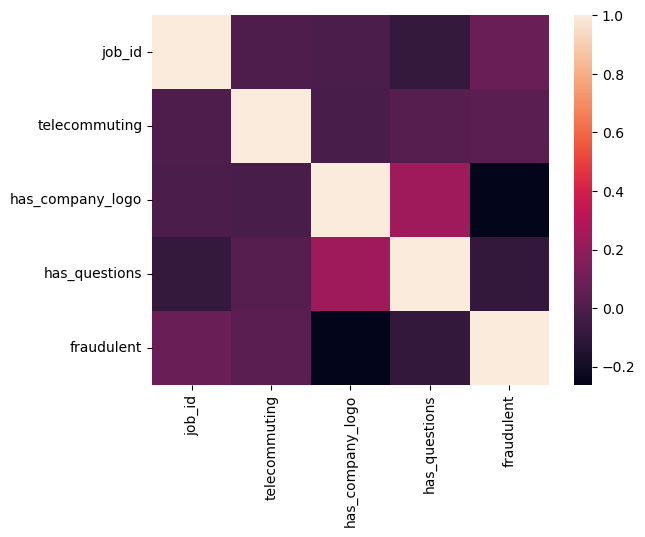

In [99]:
fake_job_postings = pd.read_csv('fake_job_postings.csv')
numericpostings = ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']
new_df = fake_job_postings[numericpostings].copy()
corr = new_df.corr()
print(corr)
sns.heatmap(corr)
plt.show()

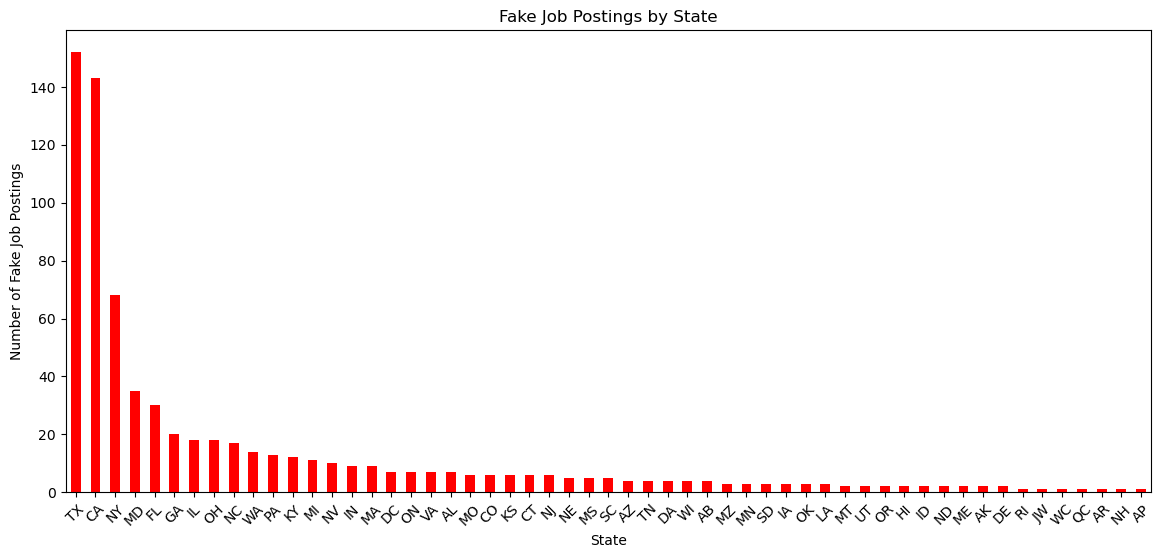

In [100]:


fake_job_postings['state'] = fake_job_postings['location'].str.extract(',\s*([A-Z]{2}),')
fraudulent_jobs = fake_job_postings[fake_job_postings['fraudulent'] == 1]
state_fraud_count = fraudulent_jobs['state'].value_counts()
# Plot the results
state_fraud_count.sort_values(ascending=False).plot(kind='bar', figsize=(14, 6), color='red')
plt.title('Fake Job Postings by State')
plt.xlabel('State')
plt.ylabel('Number of Fake Job Postings')
plt.xticks(rotation=45)
plt.show()


In [101]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fake_job_postingss = pd.read_csv('fake_job_postings.csv')
fake_job_postingss.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [102]:
fake_job_postingss.location = fake_job_postingss.location.fillna('blank')
fake_job_postingss.isnull().sum()

job_id                     0
title                      0
location                   0
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [103]:
fake_job_postingss_US = fake_job_postingss[fake_job_postingss['location'].str.contains("US")]

In [104]:
loc_split = []
for loc in fake_job_postingss_US.location:
    loc_split.append(loc.split(','))

loc_split = pd.DataFrame(loc_split)
loc_split = loc_split[[1, 2]]
loc_split = loc_split.rename(columns={1: "state", 2:'city'})

In [105]:
len(fake_job_postingss_US)/len(fake_job_postingss)

0.5959731543624162

In [106]:
fake_job_postingss_US = fake_job_postingss_US.reset_index()
fake_job_postingss_US = fake_job_postingss_US.join(loc_split)

In [107]:
fake_job_postingss_US = fake_job_postingss_US[['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'state', 'city']]

In [108]:
fake_job_postingss_US = fake_job_postingss_US[fake_job_postingss_US['city'].notna()]
fake_job_postingss_US = fake_job_postingss_US[fake_job_postingss_US['state'].notna()]

In [109]:
fake_job_postingss_US.shape

(10593, 20)

In [110]:
fake_job_postingss_US['state_city'] = fake_job_postingss_US['state'] + ", " + fake_job_postingss_US['city']

In [111]:
fake_job_postingss_US.isna().sum()

job_id                    0
title                     0
location                  0
department             7567
salary_range           9064
company_profile        2037
description               0
requirements           1745
benefits               4639
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1754
required_experience    4267
required_education     4460
industry               2672
function               3889
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [112]:
fake_job_postingss_US.city = fake_job_postingss_US.city.str.strip()
fake_job_postingss_US.state = fake_job_postingss_US.state.str.strip()

In [113]:
fake_job_postingss_US

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city,state_city
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,Other,Internship,NaN,NaN,Marketing,0,NY,New York,"NY, New York"
1,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,IA,Wever,"IA, Wever"
2,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington"
3,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth"
4,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,MD,,"MD,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,...,0,Full-time,NaN,NaN,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco"
10652,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,0,...,0,Contract,NaN,NaN,Utilities,NaN,0,NC,Charlotte,"NC, Charlotte"
10653,17875,JavaScript Developer,"US, ,",NaN,80000-100000,NaN,"Sr, JavaScript Developer Experience : 4-10 yea...",NaN,NaN,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0,,,","
10654,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia"


In [114]:
fake_job_postingss_US['department'] = fake_job_postingss_US['department'].fillna('')
fake_job_postingss_US.isna().sum()

job_id                    0
title                     0
location                  0
department                0
salary_range           9064
company_profile        2037
description               0
requirements           1745
benefits               4639
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1754
required_experience    4267
required_education     4460
industry               2672
function               3889
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [115]:
fake_job_postingss_US = fake_job_postingss_US.drop(columns=['salary_range'])
fake_job_postingss_US.isna().sum()

job_id                    0
title                     0
location                  0
department                0
company_profile        2037
description               0
requirements           1745
benefits               4639
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1754
required_experience    4267
required_education     4460
industry               2672
function               3889
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [116]:
fake_job_postingss_US['company_profile'] = fake_job_postingss_US['company_profile'].fillna('')
fake_job_postingss_US.isna().sum()

job_id                    0
title                     0
location                  0
department                0
company_profile           0
description               0
requirements           1745
benefits               4639
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1754
required_experience    4267
required_education     4460
industry               2672
function               3889
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [117]:
fake_job_postingss_US['requirements'] = fake_job_postingss_US['requirements'].fillna('')
fake_job_postingss_US.isna().sum()

job_id                    0
title                     0
location                  0
department                0
company_profile           0
description               0
requirements              0
benefits               4639
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1754
required_experience    4267
required_education     4460
industry               2672
function               3889
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [118]:
fake_job_postingss_US['benefits'] = fake_job_postingss_US['benefits'].fillna('')
fake_job_postingss_US.isna().sum()

job_id                    0
title                     0
location                  0
department                0
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1754
required_experience    4267
required_education     4460
industry               2672
function               3889
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [119]:
fake_job_postingss_US['employment_type'] = fake_job_postingss_US['employment_type'].fillna('')
fake_job_postingss_US.isna().sum()

job_id                    0
title                     0
location                  0
department                0
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience    4267
required_education     4460
industry               2672
function               3889
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [120]:
fake_job_postingss_US['required_experience'] = fake_job_postingss_US['required_experience'].fillna('')
fake_job_postingss_US.isna().sum()

job_id                    0
title                     0
location                  0
department                0
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education     4460
industry               2672
function               3889
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [121]:
fake_job_postingss_US['required_education'] = fake_job_postingss_US['required_education'].fillna('')
fake_job_postingss_US.isna().sum()

job_id                    0
title                     0
location                  0
department                0
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
industry               2672
function               3889
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [122]:
fake_job_postingss_US['industry'] = fake_job_postingss_US['industry'].fillna('')
fake_job_postingss_US.isna().sum()

job_id                    0
title                     0
location                  0
department                0
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
industry                  0
function               3889
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [123]:
fake_job_postingss_US['function'] = fake_job_postingss_US['function'].fillna('')
fake_job_postingss_US.isna().sum()

job_id                 0
title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
state                  0
city                   0
state_city             0
dtype: int64

In [124]:
fake_job_postingss_US

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city,state_city
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,NY,New York,"NY, New York"
1,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,IA,Wever,"IA, Wever"
2,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington"
3,5,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth"
4,6,Accounting Clerk,"US, MD,",,,Job OverviewApex is an environmental consultin...,,,0,0,0,,,,,,0,MD,,"MD,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17873,Product Manager,"US, CA, San Francisco",Product Development,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,1,0,Full-time,,,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco"
10652,17874,Recruiting Coordinator,"US, NC, Charlotte",,,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,,0,1,0,Contract,,,Utilities,,0,NC,Charlotte,"NC, Charlotte"
10653,17875,JavaScript Developer,"US, ,",,,"Sr, JavaScript Developer Experience : 4-10 yea...",,,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0,,,","
10654,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia"


In [125]:
telecommuting_list = []
has_company_logo_list = []

for idx, tel, logo in zip(range(len(fake_job_postingss_US)), fake_job_postingss_US.telecommuting, fake_job_postingss_US.has_company_logo):
    if fake_job_postingss.fraudulent[idx] == 1:
        telecommuting_list.append(tel)
        has_company_logo_list.append(logo)
    else:
        pass

telecommuting_logo_df = pd.DataFrame({'telecommuting':telecommuting_list, 'has_company_logo':has_company_logo_list})

In [126]:
fake_count = 0

for fraud, tel, logo in zip(fake_job_postingss_US.fraudulent, fake_job_postingss_US.telecommuting, fake_job_postingss_US.has_company_logo):
    if (tel == 0 and logo == 0):
        if (fraud == 1):
            fake_count +=1
        else:
            pass
    else:
        pass


print(fake_count)

425


In [127]:
len(fake_job_postingss_US[fake_job_postingss_US.fraudulent == 1])

725

In [128]:
fake_count/len(fake_job_postingss_US[fake_job_postingss_US.fraudulent == 1]) * 100

58.620689655172406

In [129]:
fake_job_postingss_US['state_city'] = fake_job_postingss_US['state'] + ", " + fake_job_postingss_US['city']
location_ratio = round(fake_job_postingss_US[fake_job_postingss_US.fraudulent == 1].groupby('state_city').state_city.count()/fake_job_postingss_US[fake_job_postingss_US.fraudulent == 0].groupby('state_city').state_city.count(), 2)
location_ratio = pd.DataFrame({'state_city':location_ratio.index, 'ratio':location_ratio.values})

In [130]:
location_ratio = round(fake_job_postingss_US[fake_job_postingss_US.fraudulent == 1].groupby('state_city').state_city.count()/fake_job_postingss_US[fake_job_postingss_US.fraudulent == 0].groupby('state_city').state_city.count(), 2)
location_ratio = pd.DataFrame({'state_city':location_ratio.index, 'ratio':location_ratio.values})

In [131]:
fake_job_postingss_US = fake_job_postingss_US.merge(location_ratio)

In [132]:
fake_job_postingss_US.ratio.fillna(0, inplace=True)

In [133]:
fake_job_postingss_US['text'] =  fake_job_postingss_US['title'] + ' ' + fake_job_postingss_US['location'] + ' ' + fake_job_postingss_US['company_profile'] + ' ' + \
        fake_job_postingss_US['description'] + ' ' + fake_job_postingss_US['requirements'] + ' ' + fake_job_postingss_US['benefits'] + ' ' + \
        fake_job_postingss_US['required_experience'] + ' ' + fake_job_postingss_US['required_education'] + ' ' + fake_job_postingss_US['industry'] + ' ' + fake_job_postingss_US['function']


fake_job_postingss_US.drop(['job_id', 'department', 'title','location','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function', 'city', 'state_city', 'has_company_logo', 'has_questions', 'state'], axis = 1, inplace = True)

In [134]:
fake_job_postingss_US.isnull().sum
fake_job_postingss_US

,telecommuting,fraudulent,ratio,text
0,0,0,0.03,"Marketing Intern US, NY, New York We're Food52..."
1,0,0,0.03,"Visual Designer US, NY, New York Kettle is an ..."
2,0,0,0.03,"H1B SPONSOR FOR L1/L2/OPT US, NY, New York i2..."
3,0,0,0.03,"Payroll Tax Specialist US, NY, New York Namely..."
4,0,0,0.03,"Marketing Manager US, NY, New York Super Socce..."
...,...,...,...,...
10588,1,1,0.00,"Military Benefits Counselor US, , chicago Anth..."
10589,0,0,0.00,Sr.Business Intelligence Technical Architect U...
10590,0,0,0.00,Licensed Practical Nurse (LPN)- Private Duty U...
10591,0,0,0.00,"SAS Grid Developer US, NJ, Berkeley Heights J..."


In [135]:
fake_job_postingss_US['character_count'] = fake_job_postingss_US.text.apply(len)

In [136]:
fake_job_postingss_US

,telecommuting,fraudulent,ratio,text,character_count
0,0,0,0.03,"Marketing Intern US, NY, New York We're Food52...",2702
1,0,0,0.03,"Visual Designer US, NY, New York Kettle is an ...",1985
2,0,0,0.03,"H1B SPONSOR FOR L1/L2/OPT US, NY, New York i2...",7163
3,0,0,0.03,"Payroll Tax Specialist US, NY, New York Namely...",1560
4,0,0,0.03,"Marketing Manager US, NY, New York Super Socce...",2871
...,...,...,...,...,...
10588,1,1,0.00,"Military Benefits Counselor US, , chicago Anth...",1168
10589,0,0,0.00,Sr.Business Intelligence Technical Architect U...,1264
10590,0,0,0.00,Licensed Practical Nurse (LPN)- Private Duty U...,2120
10591,0,0,0.00,"SAS Grid Developer US, NJ, Berkeley Heights J...",1535


In [137]:
X = fake_job_postingss_US[['telecommuting', 'ratio', 'text', 'character_count']]
y = fake_job_postingss_US['fraudulent']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

In [139]:
X_train_num = X_train[['telecommuting', 'ratio', 'character_count']]
X_test_num = X_test[['telecommuting', 'ratio', 'character_count']]

In [140]:
count_vectorizer = CountVectorizer(stop_words = 'english')
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(X_test.text.values)

In [141]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names_out())

In [142]:
count_df

,00,000,0001pt,0005,000apply,000bonus,000full,000generate,000health,000if,...,zoomtext,zos,zuora,zurb,zweig,zynga,åsgard,être,über,ˈinkyəˌbātər
0,0,2,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

nb_classifier = RandomForestClassifier()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
f1

0.7923497267759564